# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,make_scorer

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

# Introduction

The objective of this task is to predict what a tourist will spend when visiting Tanzania using machine learning. The model can be used by tour operators and the Tanzania Tourism Board to help tourist understand how much they can epect to spend on their visit to the country.

# Data Sourcing/Labelling

The data was aquired from the Zindi platform at https://zindi.africa/competitions/tanzania-tourism-prediction. The test data will be used to predict unseen data. The samplesubmission is used as a template for the final prediction dataframe.

In [2]:
train =pd.read_csv('Train.csv')
test =pd.read_csv('Test.csv')
submit =pd.read_csv('SampleSubmission.csv')

# Exploratory Data Analysis

The following offers a look into what the data looks like, it explores the structure, distribution and statistics of the underlying data.

In [3]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


The training set constists of 4809 observations and 23 columns which includes the target variable which is total_cost

In [4]:
print(train.shape)

(4809, 23)


The following shows the datatypes of the variables of interest. The ID column is a unique identifier of each tourist.

In [5]:
print(train.dtypes.to_string())

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64


The following describes the statistics for the numerical variables in the data. The average cost of a tourist is 8114389

In [6]:
# descriptions
print(train.describe())

       total_female   total_male  night_mainland  night_zanzibar    total_cost
count   4806.000000  4804.000000     4809.000000     4809.000000  4.809000e+03
mean       0.926758     1.009575        8.488043        2.304429  8.114389e+06
std        1.288242     1.138865       10.427624        4.227080  1.222490e+07
min        0.000000     0.000000        0.000000        0.000000  4.900000e+04
25%        0.000000     1.000000        3.000000        0.000000  8.121750e+05
50%        1.000000     1.000000        6.000000        0.000000  3.397875e+06
75%        1.000000     1.000000       11.000000        4.000000  9.945000e+06
max       49.000000    44.000000      145.000000       61.000000  9.953288e+07


The plot below shows the top 20 countries of tourists who visit Tanzania.

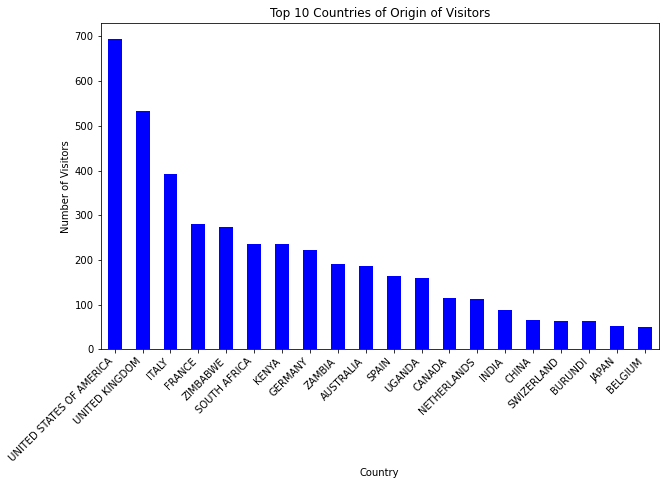

In [7]:
#top 20 countries
top_countries = train['country'].value_counts().nlargest(20)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='blue')
plt.title('Top 10 Countries of Origin of Visitors')
plt.xlabel('Country')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45, ha='right')  # Adjusting rotation for better visibility
plt.show()

The graph below shows the top 20 countries that spend the most money when they are in Tanzania. American tourists spend significantly higher than all the countries in total. 

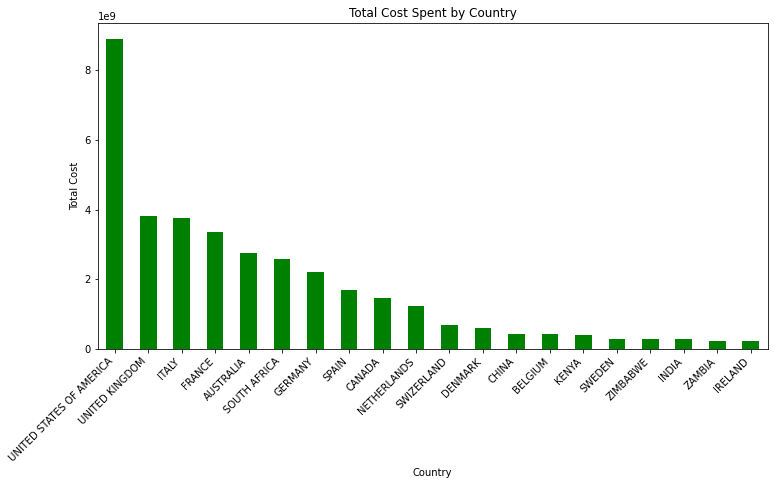

In [8]:
total_cost_by_country = train.groupby('country')['total_cost'].sum().sort_values(ascending=False).nlargest(20)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
total_cost_by_country.plot(kind='bar', color='green')
plt.title('Total Cost Spent by Country')
plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.xticks(rotation=45, ha='right')  # Adjusting rotation for better visibility
plt.show()

Most toursist are between the ages of 22 and 44. We do not see a lot of visitors who are 65 years and older.

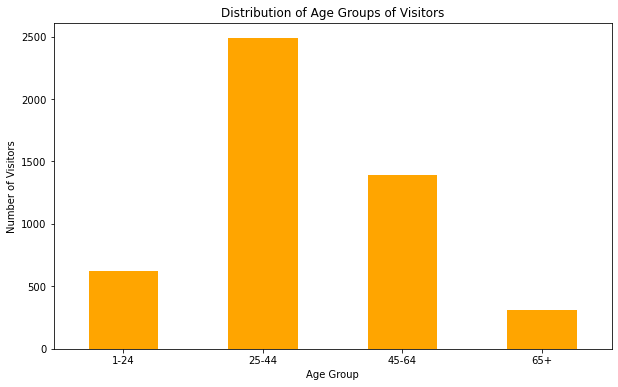

In [9]:
#count age groups
age_group_counts = train['age_group'].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Age Groups of Visitors')
plt.xlabel('Age Group')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=0)  # Adjust rotation for better visibility
plt.show()

Most of visitors travel alone, followed by travelling with a spouse.

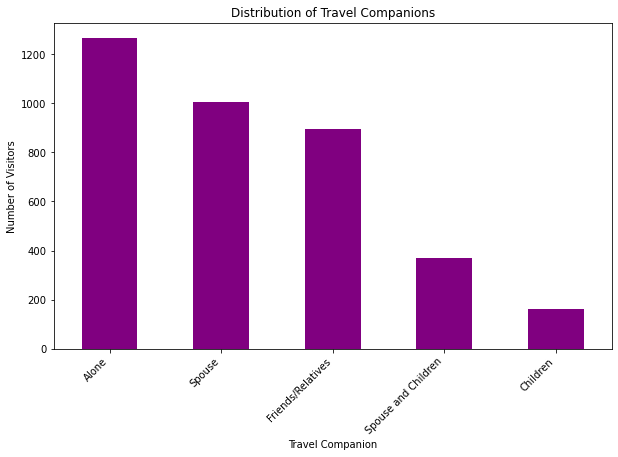

In [10]:
travel_with_counts = train['travel_with'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
travel_with_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Travel Companions')
plt.xlabel('Travel Companion')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()

The majority of visitors are in Tanzani for leisure and holiday.

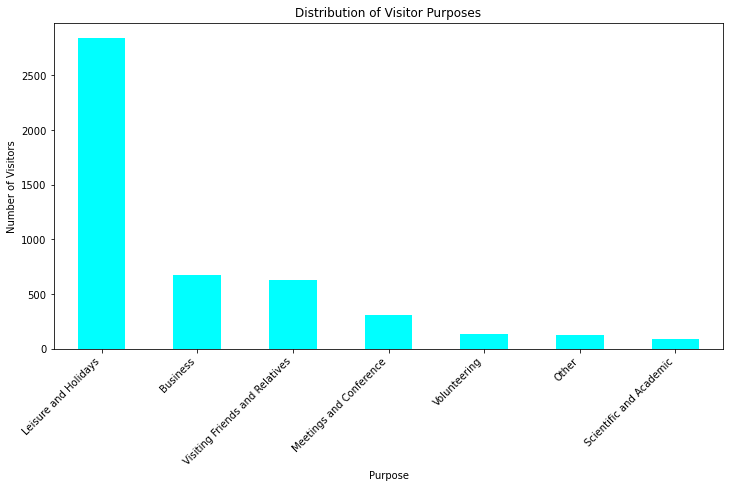

In [11]:
purpose_counts = train['purpose'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
purpose_counts.plot(kind='bar', color='cyan')
plt.title('Distribution of Visitor Purposes')
plt.xlabel('Purpose')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()

The most popular activity is wildlife tourism followed by going to the beach. This will be helpful to recommend for tourist when they visit the country.

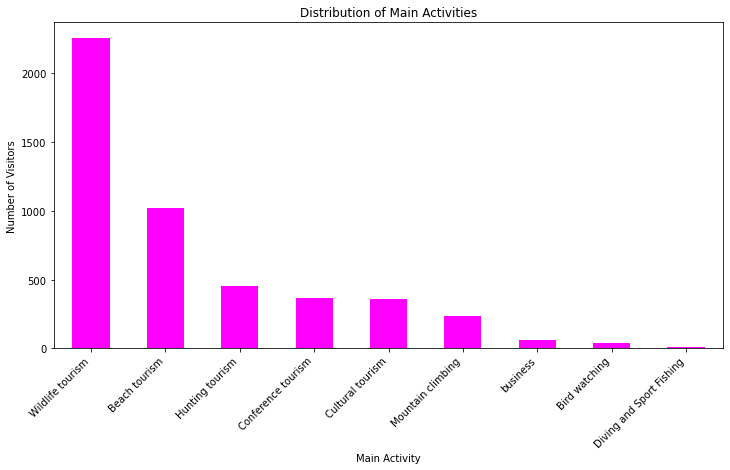

In [12]:
main_activity_counts = train['main_activity'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
main_activity_counts.plot(kind='bar', color='magenta')
plt.title('Distribution of Main Activities')
plt.xlabel('Main Activity')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()

The following shows the distribution of payment methods. Most visitors use cash to transact.

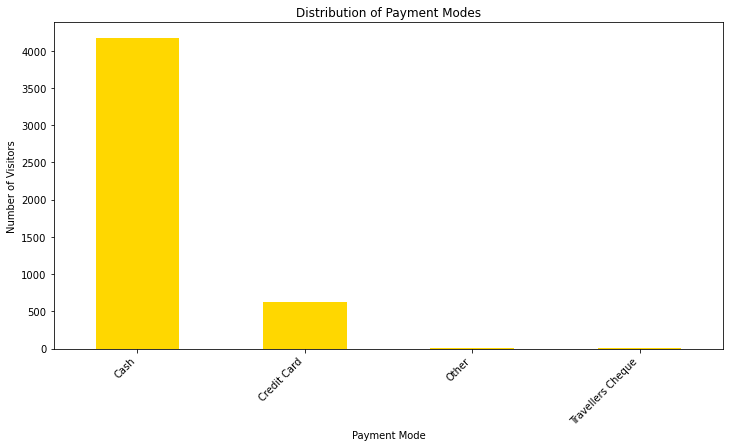

In [13]:
payment_mode_counts = train['payment_mode'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
payment_mode_counts.plot(kind='bar', color='gold')
plt.title('Distribution of Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()

What tourists love the most about they time in Tanzania is how friendly the people are. The wildlife is also an attractive activity and most people were impressed by it.

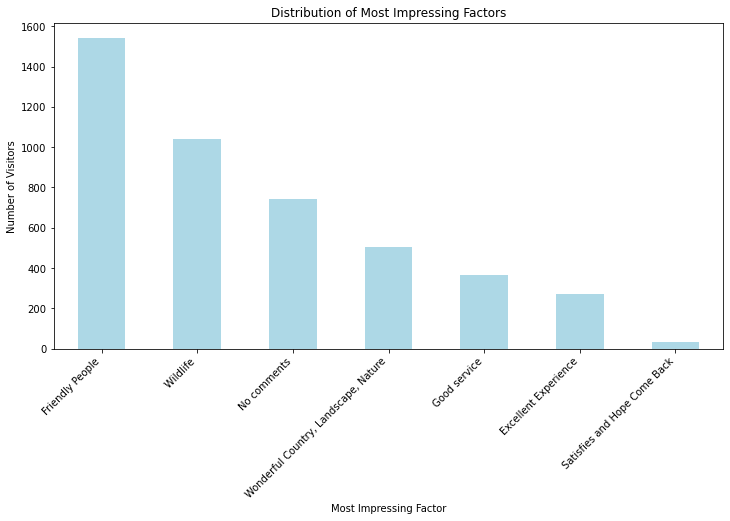

In [14]:
most_impressing_counts = train['most_impressing'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
most_impressing_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Most Impressing Factors')
plt.xlabel('Most Impressing Factor')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show()

The following shows the distribution of variables and their relationship with other variables. We see that when tourist spend less amount of days in Zanziba, they spend more money. The longer the stay, the less money they spend. This is likely influenced by the reason for visiting the country. People who are visiting family would not spend a lot of money than visiters who are only in the country for a very short period of time.

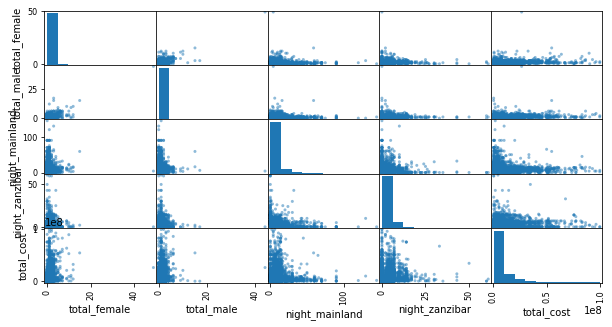

In [15]:
# scatter plot matrix
scatter_matrix(train,figsize=(10, 5))
plt.show()

# Data Augmentation

The following ahows that we have some missing values in our datasets.

In [16]:
print(train.isna().sum().sort_values(ascending= False).to_string())
print(test.isna().sum().sort_values(ascending= False).to_string())

travel_with              1114
most_impressing           313
total_male                  5
total_female                3
ID                          0
package_transport_tz        0
first_trip_tz               0
payment_mode                0
night_zanzibar              0
night_mainland              0
package_insurance           0
package_guided_tour         0
package_sightseeing         0
package_accomodation        0
package_food                0
country                     0
package_transport_int       0
tour_arrangement            0
info_source                 0
main_activity               0
purpose                     0
age_group                   0
total_cost                  0
travel_with              327
most_impressing          111
total_male                 2
total_female               1
package_transport_tz       0
first_trip_tz              0
payment_mode               0
night_zanzibar             0
night_mainland             0
package_insurance          0
package_guided_tour 

# Data Cleaning/validation/Quality Evaluation

We handle the missing values by imputing with the mode. The resulting dataset shows that we do not have any more missing values.The same is done for the test dataset.

In [17]:
# filling with most common class
train_clean = train.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(train_clean.isna().sum().sort_values(ascending= False).to_string())

ID                       0
package_food             0
most_impressing          0
first_trip_tz            0
payment_mode             0
night_zanzibar           0
night_mainland           0
package_insurance        0
package_guided_tour      0
package_sightseeing      0
package_transport_tz     0
package_accomodation     0
country                  0
package_transport_int    0
tour_arrangement         0
info_source              0
main_activity            0
purpose                  0
total_male               0
total_female             0
travel_with              0
age_group                0
total_cost               0


In [18]:
test_clean = test.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(test_clean.isna().sum().sort_values(ascending= False).to_string())

ID                       0
country                  0
first_trip_tz            0
payment_mode             0
night_zanzibar           0
night_mainland           0
package_insurance        0
package_guided_tour      0
package_sightseeing      0
package_transport_tz     0
package_food             0
package_accomodation     0
package_transport_int    0
tour_arrangement         0
info_source              0
main_activity            0
purpose                  0
total_male               0
total_female             0
travel_with              0
age_group                0
most_impressing          0


# Feature Engineering

In order to train the data, we need to prepare the variables for predictions. We have engineered more variables to help the models to have more predictive power. The total nights, total number of people and a country indicator variable have been created. The most impressing variable was dropped, this variable will not be suitable for predicting for new data as it is more a response than a feature that can influence what the potential tourist will spend on.

In [19]:
# Combine train and test set
ntrain = train_clean.shape[0]
combined = pd.concat((train_clean, test_clean)).reset_index(drop=True)

In [20]:
train_clean.shape

(4809, 23)

In [21]:
combined.shape

(6410, 23)

In [22]:
combined['total_nights'] =combined['night_zanzibar']+combined['night_mainland']
combined['total_visitors'] = combined['total_male'] + combined['total_female']

The is_top_spender variable was created by creating a flag for the top 5 countries that spend the most of money.

In [23]:
# Group by 'country' and calculate the sum of 'total_cost'
total_cost_per_country = combined.groupby('country')['total_cost'].sum().sort_values(ascending=False).head(5)

top_spenders = total_cost_per_country.index.tolist()

combined['is_top_spender'] = np.where(combined['country'].isin(top_spenders), 1, 0)

In [24]:
combined.drop(['country','most_impressing'], inplace=True, axis=1)

# Data Encoding

The variables have been transformed and the ordinal variables were chosen based on the fact that the order of the values is important.

In [25]:
#Ordinal data
le = LabelEncoder()
combined['age_group'] = le.fit_transform(combined['age_group'])
combined['package_transport_int'] = le.fit_transform(combined['package_transport_int'])
combined['package_accomodation'] = le.fit_transform(combined['package_accomodation'])
combined['package_food'] = le.fit_transform(combined['package_food'])
combined['package_transport_tz'] = le.fit_transform(combined['package_transport_tz'])
combined['package_sightseeing'] = le.fit_transform(combined['package_sightseeing'])
combined['package_guided_tour'] = le.fit_transform(combined['package_guided_tour'])
combined['package_insurance'] = le.fit_transform(combined['package_insurance'])
combined['first_trip_tz'] = le.fit_transform(combined['first_trip_tz'])

In [26]:
# Create dummy variables for categorical columns, dropfirst to avoid multicollinearity
combined_encoded = pd.get_dummies(combined, columns=['travel_with', 'purpose','main_activity','info_source','tour_arrangement','payment_mode'], drop_first=True)

In [27]:
main_cols = combined_encoded.columns.difference(['ID', 'total_cost'])
main_cols

Index(['age_group', 'first_trip_tz',
       'info_source_Newspaper, magazines,brochures',
       'info_source_Radio, TV, Web', 'info_source_Tanzania Mission Abroad',
       'info_source_Trade fair', 'info_source_Travel, agent, tour operator',
       'info_source_inflight magazines', 'info_source_others',
       'is_top_spender', 'main_activity_Bird watching',
       'main_activity_Conference tourism', 'main_activity_Cultural tourism',
       'main_activity_Diving and Sport Fishing',
       'main_activity_Hunting tourism', 'main_activity_Mountain climbing',
       'main_activity_Wildlife tourism', 'main_activity_business',
       'night_mainland', 'night_zanzibar', 'package_accomodation',
       'package_food', 'package_guided_tour', 'package_insurance',
       'package_sightseeing', 'package_transport_int', 'package_transport_tz',
       'payment_mode_Credit Card', 'payment_mode_Other',
       'payment_mode_Travellers Cheque', 'purpose_Leisure and Holidays',
       'purpose_Meetings an

In [28]:
# Separate train and test data from the combined dataframe
train_df = combined_encoded[:ntrain]
test_df = combined_encoded[ntrain:]

# Check the shapes of the split dataset
train_df.shape,train_clean.shape, test_df.shape, test.shape

((4809, 47), (4809, 23), (1601, 47), (1601, 22))

# Modelling

The following is the modelling where a couple of algorithms have been considered.

In [29]:
# Split-out validation dataset
X = train_df[main_cols]
y = train_df['total_cost']

As shown in the bar graphs above, the varibles had outliers. To solve this issue, we could drop the outliers or standardise the data to make sure they are in the same range. The data has been standardised to normalise the data. Cross validation is done to choose the best model.

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Spot Check Algorithms
models = [
    ('LR', LinearRegression()),
    ('RF', RandomForestRegressor()),
    ('LS', Lasso()),
    ('RG', Ridge()),
    ('EN', ElasticNet()),
    ('KNN', KNeighborsRegressor()),
    ('SVR', SVR(gamma='auto'))
]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_scaled, y, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print(f'Mean Absolute Error: {-cv_results.mean()}')

LR: -5734308.739271 (363476.659160)
Mean Absolute Error: 5734308.739271292
RF: -5509414.708326 (346411.951812)
Mean Absolute Error: 5509414.708325575
LS: -5733783.250287 (364868.762093)
Mean Absolute Error: 5733783.250287451
RG: -5733577.568308 (364877.323361)
Mean Absolute Error: 5733577.568307924
EN: -5606759.252752 (358211.553116)
Mean Absolute Error: 5606759.252752309
KNN: -5586144.984582 (370244.764313)
Mean Absolute Error: 5586144.984581782
SVR: -6997146.202619 (437726.431347)
Mean Absolute Error: 6997146.202619081


The graph shows that RandomforestRegressor is the best model of the tested ones.

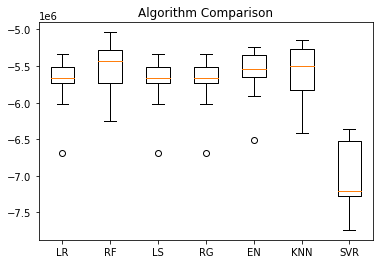

In [34]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Prediction

The following is predictions made on the test data by the best model.

In [35]:
# Choose the best hyperparameters based on cross-validation results
best_rf_model = RandomForestRegressor(random_state=42, criterion='absolute_error')

# Fit the best model on the entire dataset
best_rf_model.fit(X, y)

# predictions on new data
predictions = best_rf_model.predict(test_df[main_cols])

In [36]:
sub = submit.copy()
sub['total_cost'] = predictions
sub

,ID,total_cost
0,tour_1,1.150961e+07
1,tour_100,1.997792e+07
2,tour_1001,2.197090e+07
3,tour_1006,2.771096e+06
4,tour_1009,2.467407e+07
...,...,...
1596,tour_988,7.187612e+05
1597,tour_990,2.871074e+07
1598,tour_992,1.573311e+06
1599,tour_996,4.962281e+05


# Conclusion

The best model was a RandomForestRegressor. The prediction can still be improved further by exploring more models. The analysis provides a good indication of what activities are most popular in Tanzani and tour guides can use this to help visitors.